In [170]:
# use interpolated OCO2 average kernel, to calculate XCO2 and compare with obs.

In [171]:
# to display plots in notebook
%matplotlib inline
%config InlineBackend.figure_format = "retina"

from matplotlib import rcParams
rcParams["savefig.dpi"] = 300  # high res plots
rcParams["font.size"] = 12

import warnings
warnings.filterwarnings('ignore')

In [172]:
# to display plots in notebook
%matplotlib inline
%config InlineBackend.figure_format = "retina"

from matplotlib import rcParams
rcParams["savefig.dpi"] = 300  # high res plots
rcParams["font.size"] = 12

import warnings
warnings.filterwarnings('ignore')

In [173]:
import numpy as np
import numpy.ma as ma
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs      # map projections
from gamap_colormap import WhGrYlRd  # import the "WhGrYlRd" variable
import re

In [183]:
# pick Italy Ispra,
loc_name = 'Heidelberg'
lon_p = 8
lat_p = 49

In [175]:
# directories
model_directory = '/geos/u73/msadiq/GEOS-Chem/rundirs/ensemble_runs/CO2-2018/nd51/'
filename = 'XCO2_diff_1.nc'
ds = xr.open_dataset(model_directory + filename)
mod_p = ds['mod'].sel(lon = lon_p, lat = lat_p, method = 'nearest').values
obs_p = ds['obs'].sel(lon = lon_p, lat = lat_p, method = 'nearest').values

In [176]:
type(mod_p)

numpy.ndarray

In [177]:
for imonth in range(2,13,1):
    filename = 'XCO2_diff_' + str(imonth) + '.nc'
    ds = xr.open_dataset(model_directory + filename)
    
    mod_p = np.append(mod_p, ds['mod'].sel(lon = lon_p, lat = lat_p, method = 'nearest').values)
    obs_p = np.append(obs_p, ds['obs'].sel(lon = lon_p, lat = lat_p, method = 'nearest').values)


AttributeError: 'Line2D' object has no property 's'

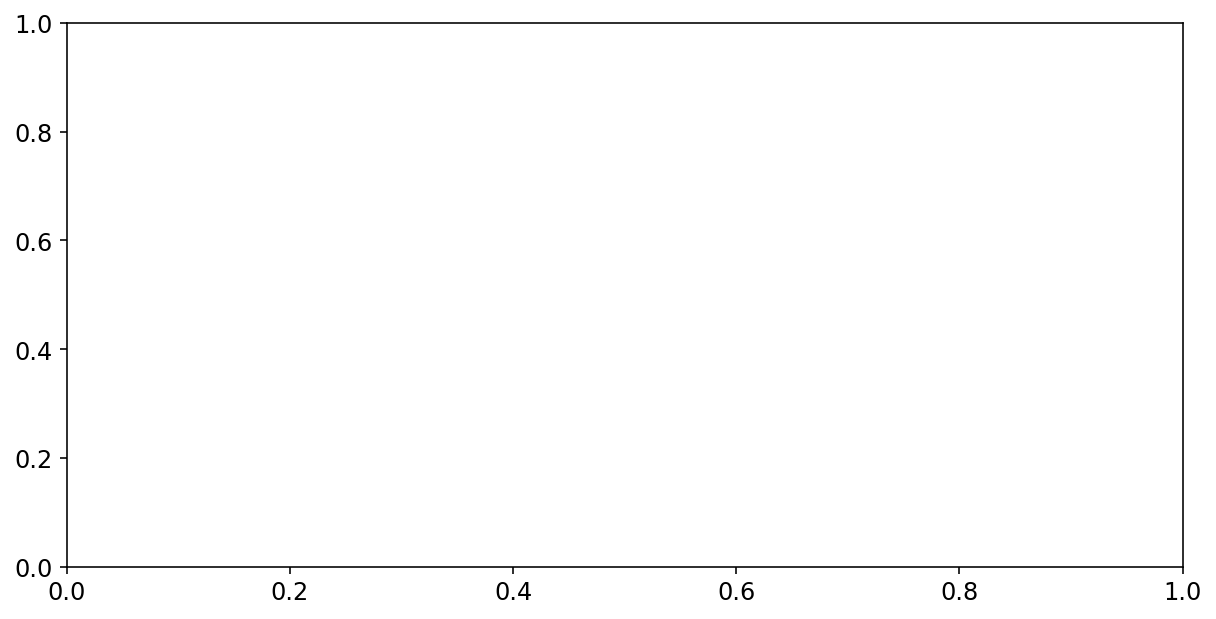

In [188]:
fig = plt.figure(figsize=[10,5])

plt.plot(range(1,363,1), mod_p, 'rx', label = 'mod')
plt.plot(range(1,363,1), obs_p, 'b.', label = 'obs')
plt.legend()

#plt.scatter(obs_p, mod_p, s=5)
#plt.plot([300,450],[300,450], c='r')
#plt.ylim(top   = 413,bottom = 399)
#plt.xlim(right = 413,left   = 399)
plt.xlim(right = 365,left   = 1)
plt.title(loc_name, loc='left')
plt.title('Lon: ' + str(lon_p) + ' Lat: ' + str(lat_p), loc='right')
plt.ylabel('XCO2 (ppmv)')
plt.xlabel('days')

fig.savefig('/geos/u73/msadiq/co2_data/extract/plots/xco2_compare.png')

In [179]:
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
name_month = month_names[month-1]
name_month

'Jan'

In [180]:
obs_series = xco2_oco2_mode.values
model_series = xco2_model_mode.values
R = ma.corrcoef(ma.masked_invalid(obs_series), ma.masked_invalid(model_series))

x = obs_series[~np.isnan(obs_series)]
y = model_series[~np.isnan(model_series)]
rmse = np.sqrt(((y - x) ** 2).mean())

format_R = float("{0:.2f}".format(R[0,1]))
format_rmse = float("{0:.2f}".format(rmse))
print('R is:', format_R, ' RMSE is: ', format_rmse)

R is: 0.75  RMSE is:  1.65


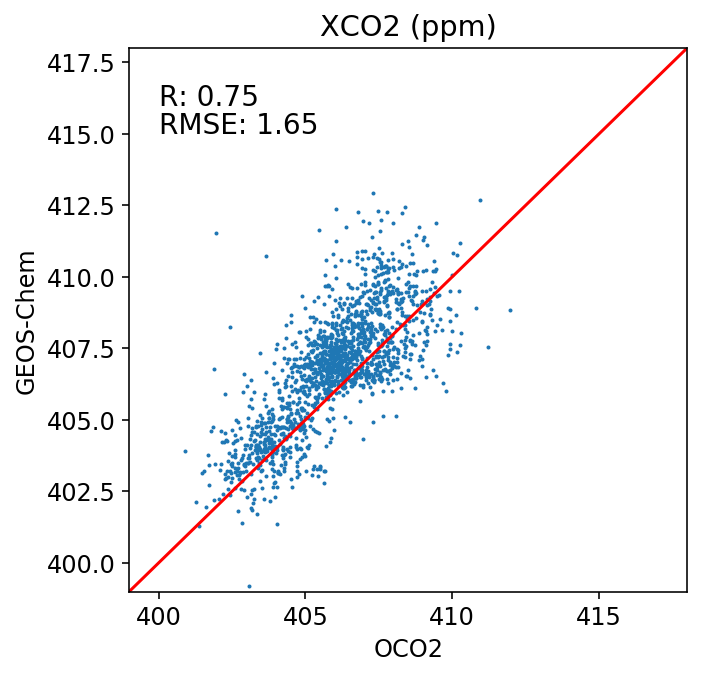

In [181]:
fig = plt.figure(figsize=[5,5])

plt.scatter(x=xco2_oco2_mode, y=xco2_model_mode, s=1)
plt.plot([300,450],[300,450], c='r')
plt.ylim(top   = 418,bottom = 399)
plt.xlim(right = 418,left   = 399)
plt.title('XCO2 (ppm)')
plt.ylabel('GEOS-Chem')
plt.xlabel('OCO2')
plt.text(x=400, y=416, s='R: ' + str(format_R), size = 14)
plt.text(x=400, y=415, s='RMSE: ' + str(format_rmse), size = 14)

fig.savefig(output_directory + '/mod_vs_obs_XCO2_' + mode + '_'+ name_month + '.png', dpi=300)